# Image Classification using Convolutional Neural Networks (CNN)

## Create a CNN Model

<b>1. Add multiple layers of convolution:</b>

The idea is that as we progress through more Conv2D layers, they will learn higher-level features.

<b>2. Introduce Max Pooling between each layer:</b>

After first pass at convolving, do a 2x2 MaxPooling2D layer to reduce the 32x32 images to 16x16. Then, do it again to get 8x8, and by the end, down to just 4x4 images. This has a good positive impact on the performance, since there is much less data to process. And, since we're trying to identify higher-level features as we go up the topology, it makes sense to use lower-resolution, less detailed images as we progress up. 

<b>3. Perform Dropout on each layer:</b>

Performing Dropout on each layer prevents the model from overfitting to the training dataset.

<b>4. Stack two Conv2D layers on top of each other:</b>

Stack two Conv2D layers on top of each other within each layer of the topology. This trick allows the model to better pick up on non-linear patterns that may exist.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
    
def createModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

## Import and Visualize the Data

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

print (y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print (y_test[0])

(50000, 32, 32, 3)
50000
10000
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


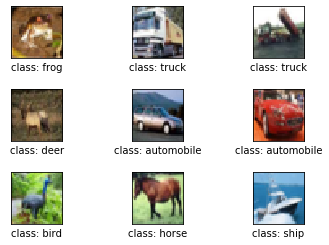

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])

    xlabel = "class: {0}".format(class_names[y_train[i].argmax()])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Compile the CNN Model with RMSprop

In [5]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model = createModel(x_train.shape[1:])

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

W0720 15:31:02.067624 14292 deprecation.py:506] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

## Train the Model

In [7]:
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(x_test, y_test),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 254us/sample - loss: 2.0181 - acc: 0.2386 - val_loss: 1.7879 - val_acc: 0.3503
Epoch 2/50
50000/50000 [==============================] - 10s 207us/sample - loss: 1.7317 - acc: 0.3559 - val_loss: 1.6627 - val_acc: 0.3950
Epoch 3/50
50000/50000 [==============================] - 10s 209us/sample - loss: 1.5646 - acc: 0.4223 - val_loss: 1.4003 - val_acc: 0.4799
Epoch 4/50
50000/50000 [==============================] - 10s 209us/sample - loss: 1.4450 - acc: 0.4702 - val_loss: 1.3660 - val_acc: 0.4989
Epoch 5/50
50000/50000 [==============================] - 10s 206us/sample - loss: 1.3506 - acc: 0.5084 - val_loss: 1.3009 - val_acc: 0.5326
Epoch 6/50
50000/50000 [==============================] - 10s 208us/sample - loss: 1.2746 - acc: 0.5420 - val_loss: 1.1458 - val_acc: 0.5906
Epoch 7/50
50000/50000 [==============================] - 10s 208us/sample - loss: 1.2071 - acc: 0.5686 

## Analyze the Model

In [8]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 72us/sample - loss: 0.6153 - acc: 0.7955
Test loss: 0.6152512768268585
Test accuracy: 0.7955


Here are some examples of where the model went wrong:

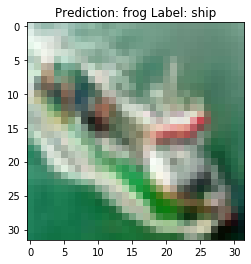

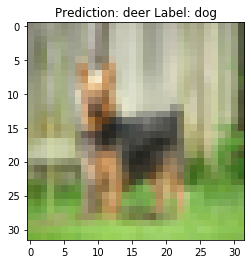

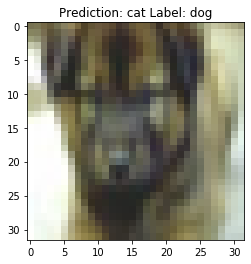

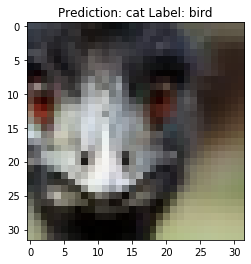

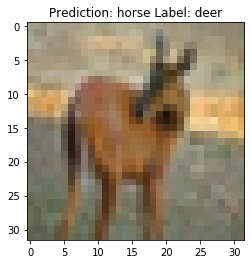

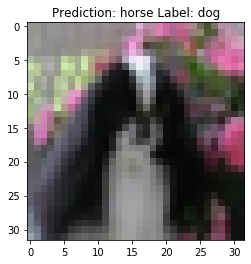

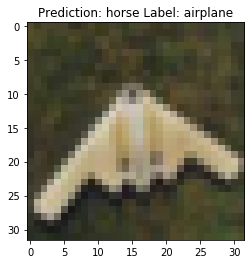

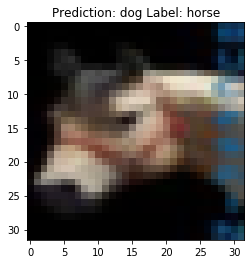

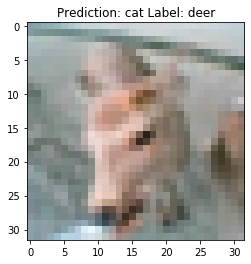

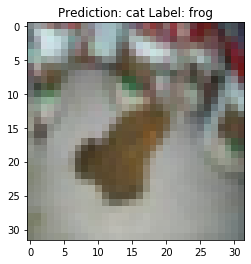

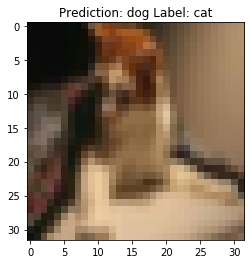

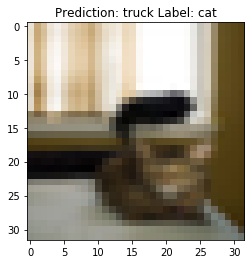

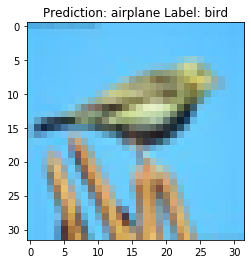

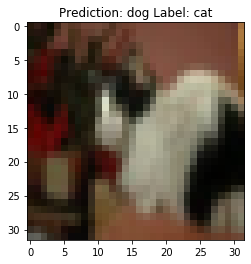

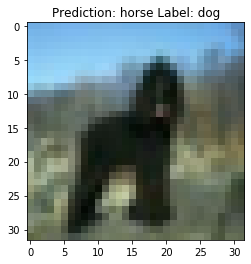

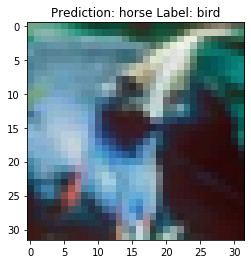

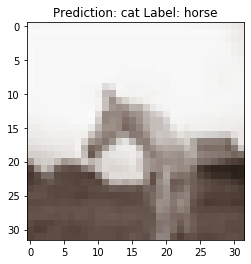

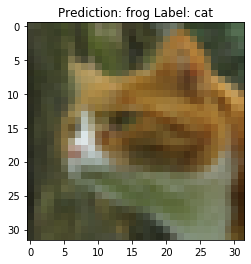

In [9]:
for x in range(100):
    test_image = x_test[x,:]
    predicted_cat = model.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()

The images that are tripping the CNN model up are in general somewhat strange examples of whatever it is that it's trying to classify.